# MACHINE LEARNING 1 to 6

## 2.1. Problem Statement: Machine Learning 1

### 1. What are the three stages to build the hypotheses or model in machine learning?

In [1]:
# First we have Data preparation
# Second we have Model building
# Third we have Model testing

### 2. What is the standard approach to supervised learning?

In [2]:
# First cleaning the data
# After split the data into 2 groups:
#  - Training data (75% of data)
#  - Test Data (25% of data)

### 3. What is Training set and Test set?

In [3]:
# Training set : is tha the data we use to build our model
# Test set : is the data we use to test if our model is accurate

### 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

In [4]:
# Ensemble method allow us to combine the prediction of multiple models in order to improve the accuracy of our model
# Bagging: Bagging is a ensemble element for improving unstable estimation or classification.


### 5. How can you avoid overfitting ?

In [5]:
# We can use cross validation
# We can train maodel with lot of data
# We can do normalization for column with big scale.

## 2.2. Problem Statement: Machine Learning 2

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from matplotlib import rcParams
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [7]:
# First check my data

#### Data shape

In [8]:
bos.shape

(506, 13)

In [9]:
# My dataset have 506 rows and 13 columns

#### Data Columns

In [10]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [11]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


#### Data description

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Define my PRICE column

In [13]:
bos['PRICE'] = boston.target

In [14]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [15]:
# Spliting my dataset to have the train and the test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


#### Building regression model

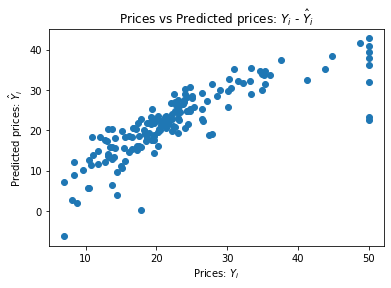

In [16]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ - $\hat{Y}_i$")
plt.show()

## 2.3. Problem Statement: Machine Learning 3

##### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [22]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

#### Data exploration

In [27]:
dta.head(20)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [26]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [28]:

# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")

In [33]:
print (X.keys)

<bound method NDFrame.keys of       Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0           1.0                   1.0                   0.0   
1           1.0                   0.0                   1.0   
2           1.0                   0.0                   1.0   
3           1.0                   0.0                   0.0   
4           1.0                   0.0                   1.0   
...         ...                   ...                   ...   
6361        1.0                   0.0                   0.0   
6362        1.0                   0.0                   0.0   
6363        1.0                   0.0                   1.0   
6364        1.0                   0.0                   1.0   
6365        1.0                   1.0                   0.0   

      C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                 

In [39]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [38]:
print (X.keys)

<bound method NDFrame.keys of       Intercept  occ_2  occ_3  occ_4  occ_5  occ_6  occ_husb_2  occ_husb_3  \
0           1.0    1.0    0.0    0.0    0.0    0.0         0.0         0.0   
1           1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
2           1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
3           1.0    0.0    0.0    0.0    1.0    0.0         0.0         0.0   
4           1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
...         ...    ...    ...    ...    ...    ...         ...         ...   
6361        1.0    0.0    0.0    1.0    0.0    0.0         0.0         1.0   
6362        1.0    0.0    0.0    0.0    1.0    0.0         0.0         0.0   
6363        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
6364        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
6365        1.0    1.0    0.0    0.0    0.0    0.0         0.0         0.0   

      occ_husb_4  occ_husb_5  occ

## 2.4. Problem Statement: Machine Learning 4

#### We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',' Ticket','Fare','Cabin','E mbarked']

In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
